# 1. Busca arboles de decision adecuados para los datos de pinguinos (considerando las 3 familias, sin considerar la isla). Discute los resultados.

Compara los resultados con K-NN.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


!pip install palmerpenguins

from palmerpenguins import load_penguins

Defaulting to user installation because normal site-packages is not writeable


In [14]:
penguins = load_penguins()
penguins.drop('island', axis=1, inplace=True)
penguins.dropna(inplace=True)
penguins['sex'] = penguins['sex'].map({'male': 0, 'female': 1})
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,39.1,18.7,181.0,3750.0,0,2007
1,Adelie,39.5,17.4,186.0,3800.0,1,2007
2,Adelie,40.3,18.0,195.0,3250.0,1,2007
4,Adelie,36.7,19.3,193.0,3450.0,1,2007
5,Adelie,39.3,20.6,190.0,3650.0,0,2007


In [31]:
X = penguins.drop('species', axis=1)
y = penguins['species']

Se divide el dataset en un conjunto de prueba y uno de entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

## Arboles de decision
Entrenamiento de diferentes arboles con valores progresivos de $\alpha$

In [44]:
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)

clfs = []
for ccp_alpha in path.ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

Numero de nodos de los arboles para las diferentes $\alpha$ empleadas

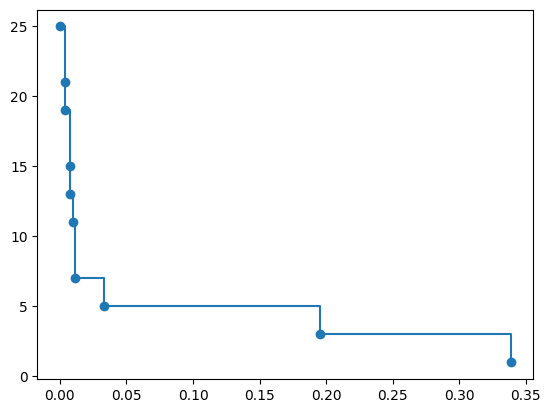

In [40]:
number_nodes = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

plt.plot(path.ccp_alphas, number_nodes, marker="o", drawstyle="steps-post")

Precision de los diferentes arboles entrenados

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

Text(0, 0.5, 'accuracy')

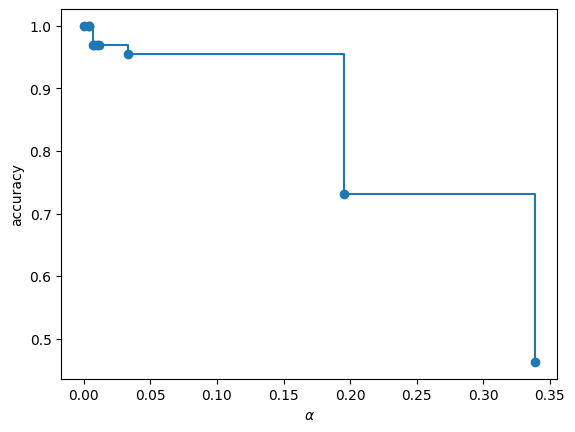

In [46]:
clfs_scores = [clf.score(X_test, y_test) for clf in clfs]
plt.figure()
plt.plot(path.ccp_alphas, clfs_scores, marker='o', drawstyle="steps-post")
plt.xlabel(r"$\alpha$")
plt.ylabel("accuracy")

El arbol con $\alpha=0$ obtiene el mejor resultado sobre el conjunto de prueba, posiblemente debido a una clara separacion en algunas de las medidas de las especies y la baja cantidad de datos.

[Text(0.640625, 0.9285714285714286, 'x[2] <= 206.5\ngini = 0.634\nsamples = 266\nvalue = [115, 50, 101]'),
 Text(0.46875, 0.7857142857142857, 'x[0] <= 43.35\ngini = 0.419\nsamples = 160\nvalue = [113, 46, 1]'),
 Text(0.3125, 0.6428571428571429, 'x[0] <= 42.35\ngini = 0.052\nsamples = 112\nvalue = [109, 3, 0]'),
 Text(0.1875, 0.5, 'x[1] <= 16.7\ngini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.125, 0.35714285714285715, 'x[0] <= 39.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.0625, 0.21428571428571427, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.1875, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.4375, 0.5, 'x[4] <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2, 0]'),
 Text(0.375, 0.35714285714285715, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.5, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.625, 0.64

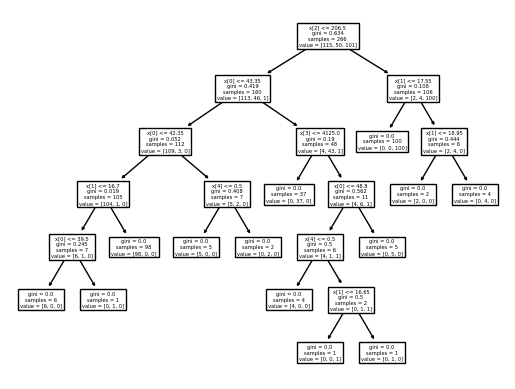

In [47]:
tree.plot_tree(clfs[0])

## KNN

In [57]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

Se calcula el F1 para diferente numero de vecinos

/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

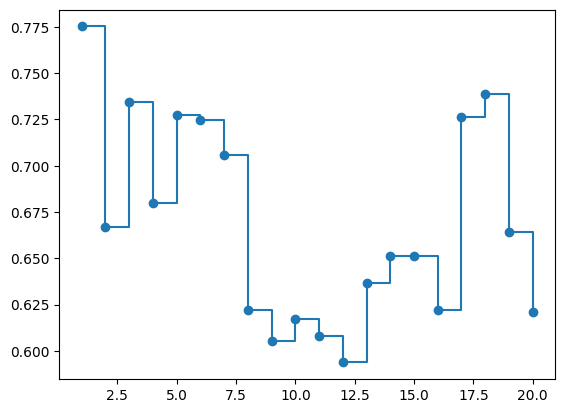

In [64]:
f1s = []
rg = range(1,21)
for i in rg:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred=neigh.predict(X_test)
    f1s.append(metrics.f1_score(y_test, y_pred, average='weighted'))
plt.plot(rg, f1s, marker='o', drawstyle="steps-post")

In [65]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.80      0.77      0.79        31
   Chinstrap       0.61      0.61      0.61        18
      Gentoo       0.89      0.94      0.92        18

    accuracy                           0.78        67
   macro avg       0.77      0.78      0.77        67
weighted avg       0.77      0.78      0.78        67



/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/juancho/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

Se observa que KNN con $k=1$ obtiene el mejor resultado, si bien es bastante mas bajo que el obtenido por el mejor arbol de decision.

Se observa que 